<a href="https://colab.research.google.com/github/newguy7/DataScienceProjects/blob/main/Credit_Card_Transactions_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
training_df = pd.read_csv('fraudTrain.csv')
testing_df = pd.read_csv('fraudTest.csv')

In [3]:
#Before we merge, lets see if the columns are same:
if training_df.columns.equals(testing_df.columns):
    print("Column names are the same.")
else:
    print("Column names are different.")

Column names are the same.


In [4]:
# Merging training and testing dataset
merged_df = pd.concat([training_df, testing_df], ignore_index=True)

In [5]:
#Shuffling the datasets
merged_df = merged_df.sample(frac=1).reset_index(drop=True)

In [6]:
merged_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,997969,2020-02-12 22:26:23,5410056176712193,fraud_Effertz LLC,entertainment,5.89,Jeffrey,Krause,M,4742 Alexandria Mountain,...,44.5592,-87.8235,4306,Art therapist,1989-10-19,28e33c513060b00ff7cfb05d4599aaae,1360707983,44.267707,-88.545457,0
1,55407,2020-07-10 15:26:35,180067784565096,fraud_Dietrich-Fadel,health_fitness,39.66,Mary,Juarez,F,35440 Ryan Islands,...,42.9385,-88.3950,2328,Applications developer,1942-01-06,ad35ae8b44a6a16089342d832ae89042,1373469995,43.498786,-87.855741,0
2,317007,2020-10-19 20:23:37,180067151859700,fraud_Haag-Blanda,food_dining,36.44,Karen,Ryan,F,82468 Michelle Village Suite 556,...,41.5378,-88.0572,128354,"Teacher, secondary school",1992-01-20,6fa935f2bbf509aa96a7fb30e9af7753,1382214217,42.477750,-87.673360,0
3,125193,2019-03-10 18:52:33,501831082224,fraud_Schaefer Ltd,kids_pets,8.09,Corey,Jones,M,709 George Underpass Apt. 080,...,40.9493,-78.3129,1762,Armed forces logistics/support/administrative ...,1962-05-04,89af0fb4f559b122c35311983ea129dd,1331405553,41.193376,-78.165457,0
4,140524,2020-08-09 17:28:24,4560395181594436016,"fraud_Altenwerth, Cartwright and Koss",shopping_net,9.57,Angela,Taylor,F,6343 Ramirez Skyway Apt. 518,...,39.0470,-122.9328,11256,Podiatrist,1972-10-18,968b8d86a3ab67fa95de4a35e9c4d586,1376069304,39.389589,-122.486017,0


In [7]:
import numpy as np
# check nan values in the is_fraud column
merged_df[merged_df['is_fraud'].isna()]

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud


In [8]:
merged_df.isna().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [9]:
# Remove the rows with nan values
clean_df = merged_df.dropna()

In [10]:
# check for nan values
clean_df.isna().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [11]:
# Remove column Unnamed: 0
clean_df = clean_df.drop(['Unnamed: 0'],axis=1)

In [12]:
# Show all columns
pd.set_option('display.max_columns',None)

In [13]:
clean_df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2020-02-12 22:26:23,5410056176712193,fraud_Effertz LLC,entertainment,5.89,Jeffrey,Krause,M,4742 Alexandria Mountain,New Franken,WI,54229,44.5592,-87.8235,4306,Art therapist,1989-10-19,28e33c513060b00ff7cfb05d4599aaae,1360707983,44.267707,-88.545457,0
1,2020-07-10 15:26:35,180067784565096,fraud_Dietrich-Fadel,health_fitness,39.66,Mary,Juarez,F,35440 Ryan Islands,North Prairie,WI,53153,42.9385,-88.3950,2328,Applications developer,1942-01-06,ad35ae8b44a6a16089342d832ae89042,1373469995,43.498786,-87.855741,0
2,2020-10-19 20:23:37,180067151859700,fraud_Haag-Blanda,food_dining,36.44,Karen,Ryan,F,82468 Michelle Village Suite 556,Joliet,IL,60432,41.5378,-88.0572,128354,"Teacher, secondary school",1992-01-20,6fa935f2bbf509aa96a7fb30e9af7753,1382214217,42.477750,-87.673360,0
3,2019-03-10 18:52:33,501831082224,fraud_Schaefer Ltd,kids_pets,8.09,Corey,Jones,M,709 George Underpass Apt. 080,West Decatur,PA,16878,40.9493,-78.3129,1762,Armed forces logistics/support/administrative ...,1962-05-04,89af0fb4f559b122c35311983ea129dd,1331405553,41.193376,-78.165457,0
4,2020-08-09 17:28:24,4560395181594436016,"fraud_Altenwerth, Cartwright and Koss",shopping_net,9.57,Angela,Taylor,F,6343 Ramirez Skyway Apt. 518,Lakeport,CA,95453,39.0470,-122.9328,11256,Podiatrist,1972-10-18,968b8d86a3ab67fa95de4a35e9c4d586,1376069304,39.389589,-122.486017,0


In [14]:
clean_df.shape
print(f"Data has {clean_df.shape[0]} rows and {clean_df.shape[1]} columns.")

Data has 1852394 rows and 22 columns.


In [15]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 22 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   trans_date_trans_time  object 
 1   cc_num                 int64  
 2   merchant               object 
 3   category               object 
 4   amt                    float64
 5   first                  object 
 6   last                   object 
 7   gender                 object 
 8   street                 object 
 9   city                   object 
 10  state                  object 
 11  zip                    int64  
 12  lat                    float64
 13  long                   float64
 14  city_pop               int64  
 15  job                    object 
 16  dob                    object 
 17  trans_num              object 
 18  unix_time              int64  
 19  merch_lat              float64
 20  merch_long             float64
 21  is_fraud               int64  
dtypes: float64(5), int

In [16]:
category_df = clean_df['category'].value_counts()
category_df

category
gas_transport     188029
grocery_pos       176191
home              175460
shopping_pos      166463
kids_pets         161727
shopping_net      139322
entertainment     134118
food_dining       130729
personal_care     130085
health_fitness    122553
misc_pos          114229
misc_net           90654
grocery_net        64878
travel             57956
Name: count, dtype: int64

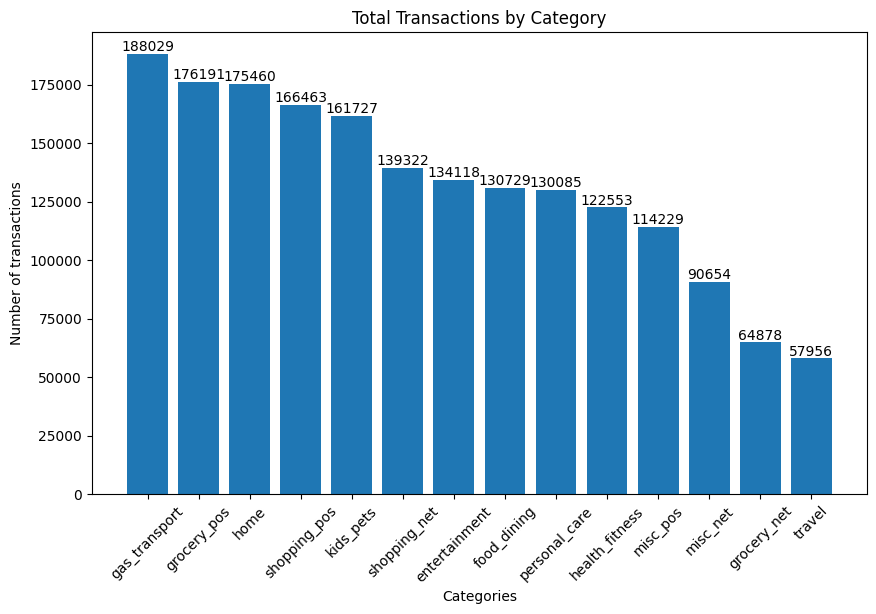

In [17]:
import matplotlib.pyplot as plt

def add_labls(x,y):
  for k in range(len(x)):
    plt.text(k,y[k],y[k],ha='center',va='bottom')

plt.figure(figsize=(10,6))

plt.bar(category_df.index,category_df.values)
add_labls(category_df.index,category_df.values)
plt.xticks(rotation=45)
plt.xlabel('Categories')
plt.ylabel('Number of transactions')
plt.title('Total Transactions by Category')

plt.show()

In [18]:
state_df = clean_df['state'].value_counts()

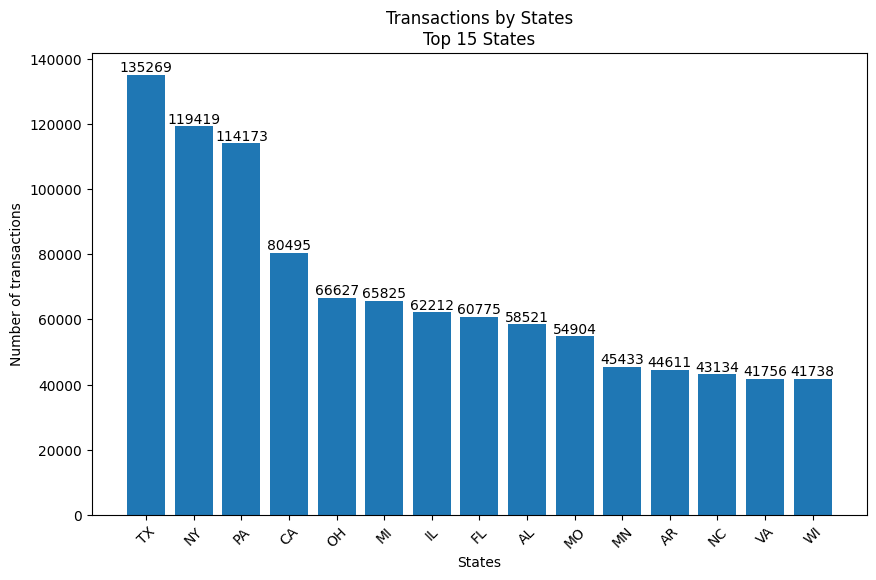

In [19]:
plt.figure(figsize=(10,6))

plt.bar(state_df[:15].index,state_df[:15].values)
add_labls(state_df[:15].index,state_df[:15].values)
plt.xticks(rotation=45)
plt.xlabel('States')
plt.ylabel('Number of transactions')
plt.title('Transactions by States\nTop 15 States')

plt.show()

In [20]:
# Convert trans_date_trans_time to datetime
clean_df['trans_date_trans_time'] = pd.to_datetime(clean_df['trans_date_trans_time'])

In [21]:
# Aggregate by month
clean_df['month'] = clean_df['trans_date_trans_time'].dt.to_period('M')
transactions_by_month = clean_df.groupby('month').size()

In [22]:
transactions_by_month.index.unique()

PeriodIndex(['2019-01', '2019-02', '2019-03', '2019-04', '2019-05', '2019-06',
             '2019-07', '2019-08', '2019-09', '2019-10', '2019-11', '2019-12',
             '2020-01', '2020-02', '2020-03', '2020-04', '2020-05', '2020-06',
             '2020-07', '2020-08', '2020-09', '2020-10', '2020-11', '2020-12'],
            dtype='period[M]', name='month')

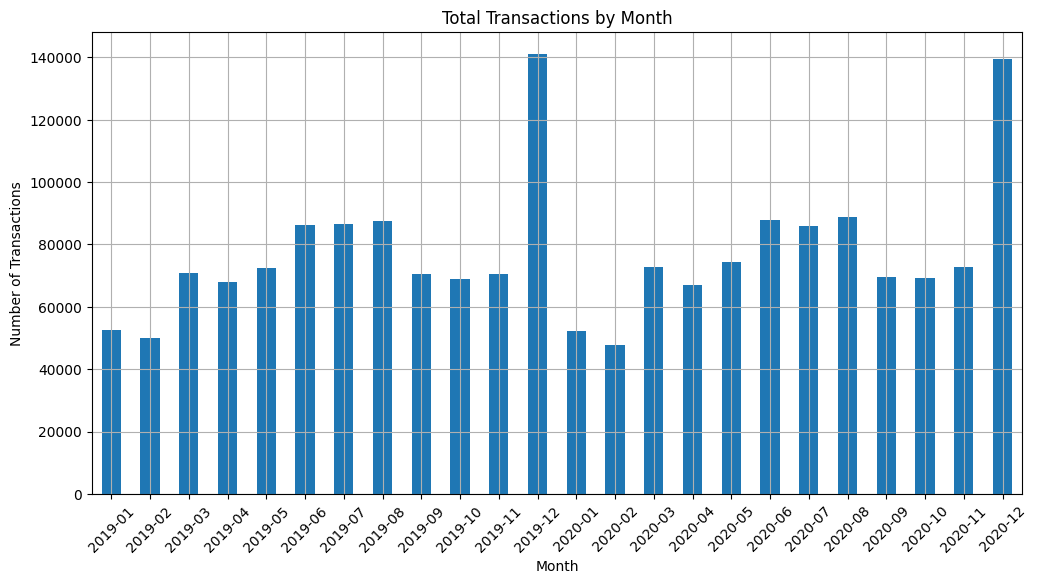

In [23]:
# Plotting transactions by date
plt.figure(figsize=(12, 6))
transactions_by_month.plot(kind='bar')
plt.title('Total Transactions by Month')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [24]:
customer_job_df = clean_df['job'].value_counts()
customer_job_df[:10]

job
Film/video editor             13898
Exhibition designer           13167
Surveyor, land/geomatics      12436
Naval architect               12434
Materials engineer            11711
Designer, ceramics/pottery    11688
Environmental consultant      10974
Financial adviser             10963
Systems developer             10962
IT trainer                    10943
Name: count, dtype: int64

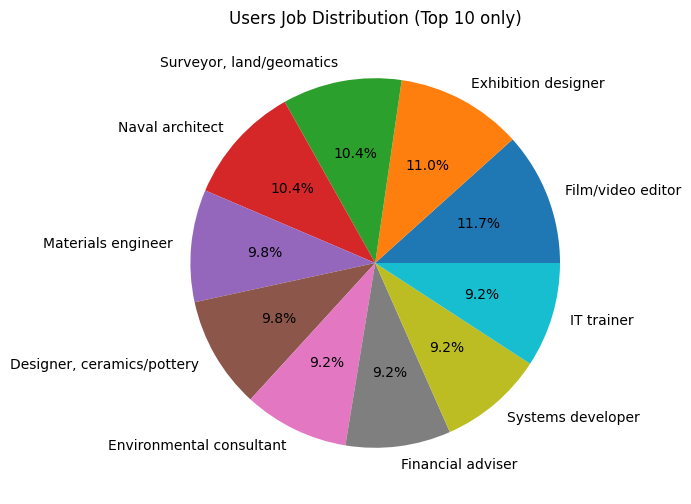

In [25]:
# Pie Chart of Users Job Distribution (Top 10 only)
plt.figure(figsize=(8, 6))
customer_job_df[:10].plot(kind='pie', autopct='%1.1f%%')
plt.title('Users Job Distribution (Top 10 only)')
plt.ylabel('')
plt.show()

In [26]:
# merchant
merchant_df = clean_df['merchant'].value_counts()
print(f"Total {len(merchant_df)} merchants were flagged for fraudulent activities.")

Total 693 merchants were flagged for fraudulent activities.


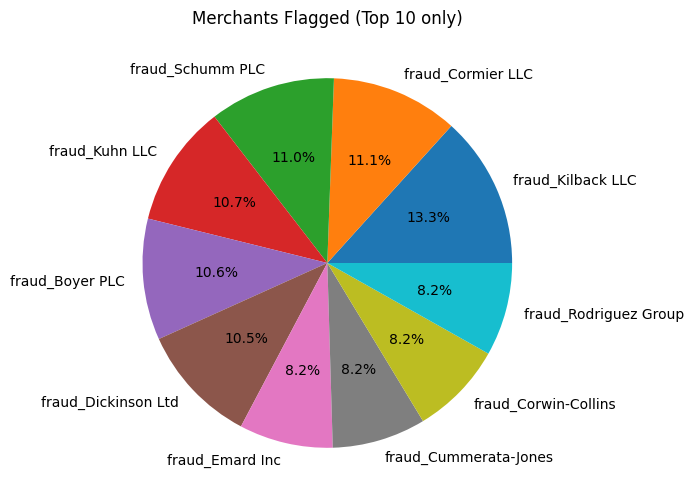

In [27]:
# Pie Chart of Users Job Distribution (Top 10 only)
plt.figure(figsize=(8, 6))
merchant_df[:10].plot(kind='pie', autopct='%1.1f%%')
plt.title('Merchants Flagged (Top 10 only)')
plt.ylabel('')
plt.show()

In [28]:
# Transactions by Age Group
from datetime import datetime
# Convert dob to datetime
clean_df['dob'] = pd.to_datetime(clean_df['dob'])

# Calculate age
current_year = datetime.now().year
clean_df['age'] = current_year - clean_df['dob'].dt.year

In [29]:
# Create age groups
bins = [0, 18, 25, 35, 45, 55, 65, 75, 85, 100]
labels = ['0-18', '19-25', '26-35', '36-45', '46-55', '56-65', '66-75', '76-85', '86+']
clean_df['age_group'] = pd.cut(clean_df['age'], bins=bins, labels=labels, right=False)

In [30]:
# Count transactions per age group
transactions_by_age_group = clean_df['age_group'].value_counts().sort_index()

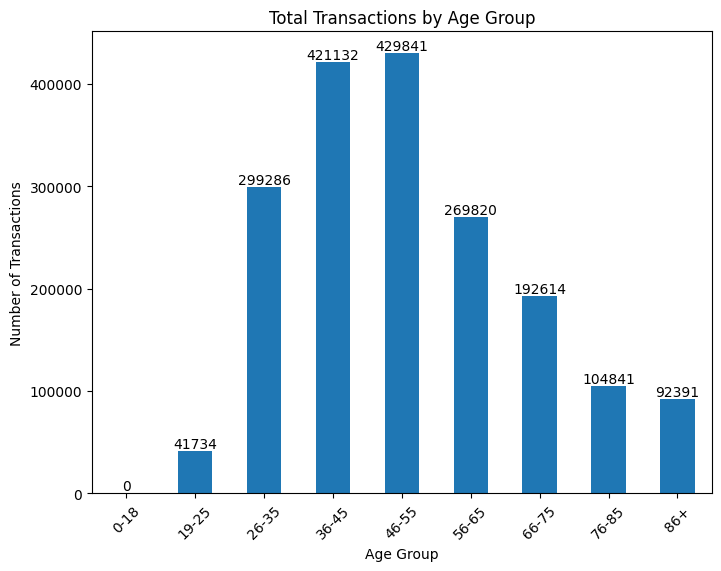

In [31]:
# Plotting Transactions by Age Group
plt.figure(figsize=(8, 6))
transactions_by_age_group.plot(kind='bar')
add_labls(transactions_by_age_group.index,transactions_by_age_group.values)
plt.title('Total Transactions by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.show()

In [32]:
# Derive additional features from 'trans_date_trans_time'

clean_df['hour'] = clean_df['trans_date_trans_time'].dt.hour
clean_df['day'] = clean_df['trans_date_trans_time'].dt.day
clean_df['weekday'] = clean_df['trans_date_trans_time'].dt.weekday
clean_df['month'] = clean_df['trans_date_trans_time'].dt.month

In [33]:
# total transactions: fraudulent and non-fraudulent
fraud_data = clean_df['is_fraud'].value_counts()
fraud_data

is_fraud
0    1842743
1       9651
Name: count, dtype: int64

In [34]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 28 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   trans_date_trans_time  datetime64[ns]
 1   cc_num                 int64         
 2   merchant               object        
 3   category               object        
 4   amt                    float64       
 5   first                  object        
 6   last                   object        
 7   gender                 object        
 8   street                 object        
 9   city                   object        
 10  state                  object        
 11  zip                    int64         
 12  lat                    float64       
 13  long                   float64       
 14  city_pop               int64         
 15  job                    object        
 16  dob                    datetime64[ns]
 17  trans_num              object        
 18  unix_time             

In [35]:
clean_df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,month,age,age_group,hour,day,weekday
0,2020-02-12 22:26:23,5410056176712193,fraud_Effertz LLC,entertainment,5.89,Jeffrey,Krause,M,4742 Alexandria Mountain,New Franken,WI,54229,44.5592,-87.8235,4306,Art therapist,1989-10-19,28e33c513060b00ff7cfb05d4599aaae,1360707983,44.267707,-88.545457,0,2,35,36-45,22,12,2
1,2020-07-10 15:26:35,180067784565096,fraud_Dietrich-Fadel,health_fitness,39.66,Mary,Juarez,F,35440 Ryan Islands,North Prairie,WI,53153,42.9385,-88.3950,2328,Applications developer,1942-01-06,ad35ae8b44a6a16089342d832ae89042,1373469995,43.498786,-87.855741,0,7,82,76-85,15,10,4
2,2020-10-19 20:23:37,180067151859700,fraud_Haag-Blanda,food_dining,36.44,Karen,Ryan,F,82468 Michelle Village Suite 556,Joliet,IL,60432,41.5378,-88.0572,128354,"Teacher, secondary school",1992-01-20,6fa935f2bbf509aa96a7fb30e9af7753,1382214217,42.477750,-87.673360,0,10,32,26-35,20,19,0
3,2019-03-10 18:52:33,501831082224,fraud_Schaefer Ltd,kids_pets,8.09,Corey,Jones,M,709 George Underpass Apt. 080,West Decatur,PA,16878,40.9493,-78.3129,1762,Armed forces logistics/support/administrative ...,1962-05-04,89af0fb4f559b122c35311983ea129dd,1331405553,41.193376,-78.165457,0,3,62,56-65,18,10,6
4,2020-08-09 17:28:24,4560395181594436016,"fraud_Altenwerth, Cartwright and Koss",shopping_net,9.57,Angela,Taylor,F,6343 Ramirez Skyway Apt. 518,Lakeport,CA,95453,39.0470,-122.9328,11256,Podiatrist,1972-10-18,968b8d86a3ab67fa95de4a35e9c4d586,1376069304,39.389589,-122.486017,0,8,52,46-55,17,9,6


In [60]:
sort_trans = clean_df[clean_df['cc_num']==60422928733]
sort_trans.count()

trans_date_trans_time    2200
cc_num                   2200
merchant                 2200
category                 2200
amt                      2200
first                    2200
last                     2200
gender                   2200
street                   2200
city                     2200
state                    2200
zip                      2200
lat                      2200
long                     2200
city_pop                 2200
job                      2200
dob                      2200
trans_num                2200
unix_time                2200
merch_lat                2200
merch_long               2200
is_fraud                 2200
month                    2200
age                      2200
age_group                2200
hour                     2200
day                      2200
weekday                  2200
dtype: int64

In [73]:
# Group the data by 'cc_num' and 'is_fraud',
# then count the number of transactions for each group

mul_trans = clean_df.groupby(['cc_num', 'is_fraud'],as_index=False).size()
fraud_cc_trans = mul_trans[mul_trans['is_fraud']==1]

# Top 10 credit card number that there flagged with fraud transactions
fraud_cc_trans.sort_values('size',ascending=False).head(n=10)

,cc_num,is_fraud,size
230,4593569795412,1,19
1396,4599285557366057,1,19
937,3520550088202337,1,19
1674,6538441737335434,1,18
187,4260128500325,1,18
1183,3589289942931264,1,16
1404,4629451965224809,1,16
774,2227671554547514,1,16
1781,4400011257587661852,1,16
1479,4874006077381178,1,16


In [78]:
# count the occurrences of transactions each hour
trans_per_hour = clean_df['hour'].value_counts()
trans_per_hour

hour
23    95902
22    95370
16    94289
18    94052
21    93738
17    93514
13    93492
15    93439
19    93433
12    93294
14    93089
20    93081
1     61330
3     60968
2     60796
0     60655
8     60498
6     60406
10    60320
7     60301
9     60231
11    60170
5     60088
4     59938
Name: count, dtype: int64

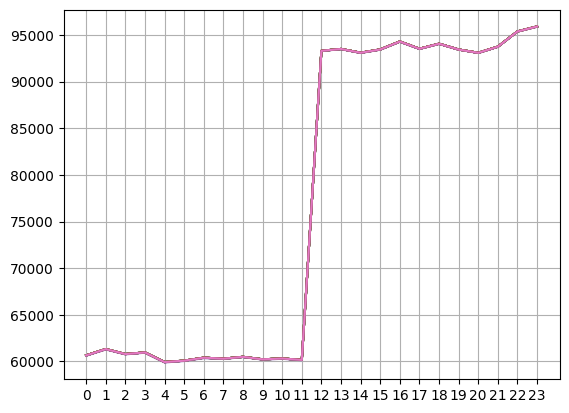

In [77]:
#get all the unique value of hour
hours = [hour for hour, df in clean_df.groupby('hour')]

plt.plot(hours, clean_df.groupby(['hour']).count())
plt.xticks(hours)
plt.grid()
plt.show()

In [96]:
# Filter the DataFrame for fraudulent transactions and count the occurrences of each hour
fraud_trans = clean_df[clean_df['is_fraud']==1]['hour'].value_counts()
fraud_trans = fraud_trans.sort_index()
fraud_trans

hour
0      823
1      827
2      793
3      803
4       61
5       80
6       54
7       72
8       59
9       61
10      52
11      59
12      84
13      94
14     100
15     100
16      97
17      94
18     111
19     105
20      98
21     101
22    2481
23    2442
Name: count, dtype: int64

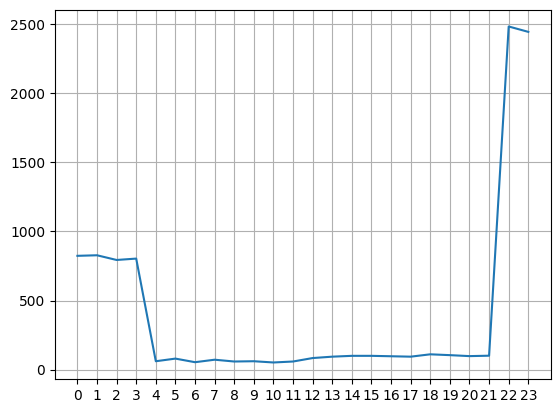

In [97]:
plt.plot(fraud_trans.index, fraud_trans.values)
plt.xticks(fraud_trans.index)
plt.grid()
plt.show()

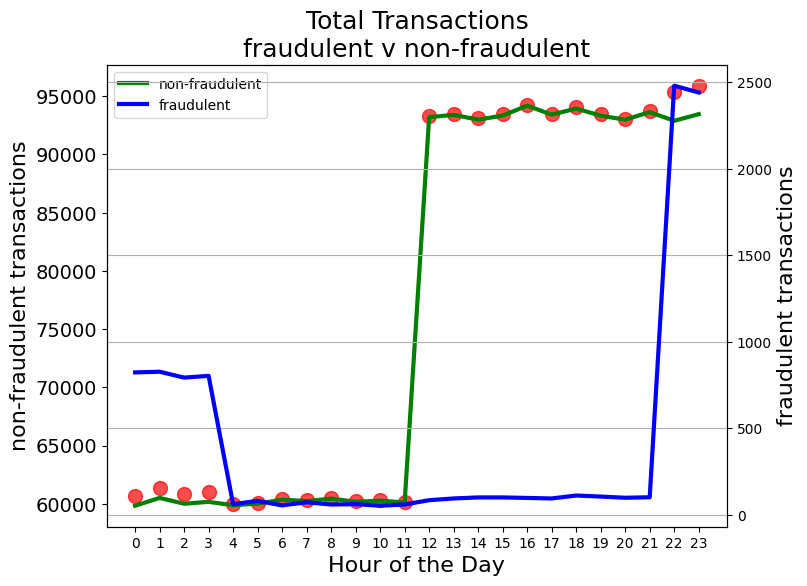

In [125]:
# total transactions by hour
total_trans = clean_df['hour'].value_counts().sort_index()

# total non-fraudulent transactions by hour
non_fraud_trans = clean_df[clean_df['is_fraud'] == 0]['hour'].value_counts().sort_index()

# total fraudulent transactions by hour
fraud_trans = clean_df[clean_df['is_fraud'] == 1]['hour'].value_counts().sort_index()

plt.figure(figsize=(8,6))
plt.title('Total Transactions\nfraudulent v non-fraudulent', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fraud_trans.index)

ax1=plt.gca()
ax2 = ax1.twinx() #create second y-axis

# plot the total transactions
ax1.scatter(x=total_trans.index, y=total_trans.values,c='red',alpha=0.7,s=100)

# Plot non-fraudulent transactions
line1, = ax1.plot(non_fraud_trans.index,non_fraud_trans.values, c='green', linewidth=3,label='non-fraudulent')
ax1.set_xlabel('Hour of the Day',fontsize=16)
ax1.set_ylabel('non-fraudulent transactions',fontsize=16)

# Plot fraudulent transactions
line2, = ax2.plot(fraud_trans.index, fraud_trans.values, c='blue', linewidth=3,label='fraudulent')
ax2.set_ylabel('fraudulent transactions',fontsize=16)

# Combine the legends from both axes
ax1.legend(handles=[line1, line2], loc='upper left')

plt.grid()
plt.show()

In [36]:
# 'hour', 'day', 'weekday', 'month', 'amt', 'merchant', 'category', 'merch_lat', 'merch_long', 'city_pop', 'job', 'gender', 'age', 'cc_num'
# unwanted observations: Unanmed: 0, first, last, street, lat, long, trans_date_trans_time